In [13]:
from DataProcessing import PrepareDataWithSA_Word2Vec
from DataProcessing import PrepareData
start_date="2021-03-12"
last_date="2022-05-02"
stock_name="Coupang"
CPNG_train_set, CPNG_test_set,CPNG_only_stock_train_set, CPNG_only_stock_test_set=PrepareDataWithSA_Word2Vec.getPreaparedData(stock_name,start_date,last_date)

start_date="2020-11-01"
last_date="2022-05-02"
stock_name="palantir"
PLTR_train_set, PLTR_test_set,PLTR_only_stock_train_set, PLTR_only_stock_test_set=PrepareDataWithSA_Word2Vec.getPreaparedData(stock_name,start_date,last_date)


start_date="2016-01-01"
last_date="2022-05-24"
stock_name="Tesla"
TSLA_train_set, TSLA_test_set,TSLA_only_stock_train_set, TSLA_only_stock_test_set=PrepareDataWithSA_Word2Vec.getPreaparedData(stock_name,start_date,last_date)

In [14]:
TSLA_train_set.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'tw_count',
       'tw_n_pos', 'tw_n_neg', 'tw_ratio_pos', 'tw_ratio_neg'],
      dtype='object')

In [15]:
CPNG_train_data, target_data, CPNG_test_train_data, CPNG_test_target_data=PrepareData.makeLSTMDataSet(CPNG_train_set, CPNG_test_set)
CPNG_only_stock_train_data, CPNG_only_stock_target_data, CPNG_only_stock_test_train_data, CPNG_only_stock_test_target_data=PrepareData.makeLSTMDataSet(CPNG_only_stock_train_set, CPNG_only_stock_test_set)

PLTR_train_data, tPLTR_arget_data, PLTR_test_train_data, PLTR_test_target_data=PrepareData.makeLSTMDataSet(PLTR_train_set, PLTR_test_set)
PLTR_only_stock_train_data, PLTR_only_stock_target_data, PLTR_only_stock_test_train_data, PLTR_only_stock_test_target_data=PrepareData.makeLSTMDataSet(PLTR_only_stock_train_set, PLTR_only_stock_test_set)

train_data, target_data, test_train_data, test_target_data=PrepareData.makeLSTMDataSet(TSLA_train_set, TSLA_test_set)
only_stock_train_data, only_stock_target_data, only_stock_test_train_data, only_stock_test_target_data=PrepareData.makeLSTMDataSet(TSLA_only_stock_train_set, TSLA_only_stock_test_set)

In [16]:
from Model import MakeLSTMModel

best_model=MakeLSTMModel.getBestModel(train_data,target_data,"recommend_stock")
best_model.fit(train_data, target_data, epochs = 1000, validation_data = (test_train_data, test_target_data))
best_model.save("best_model.h5")

INFO:tensorflow:Reloading Oracle from existing project model_store\recommend_stock\oracle.json
INFO:tensorflow:Reloading Tuner from model_store\recommend_stock\tuner0.json
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 50 and the optimal learning rate for the optimizer
    is 0.01.
    
Epoch 1/1000
35/35 [==============================] - 3s 21ms/step - loss: 11.9891 - val_loss: 17.3375
Epoch 2/1000
35/35 [==============================] - 0s 5ms/step - loss: 11.7782 - val_loss: 17.2363
Epoch 3/1000
35/35 [==============================] - 0s 5ms/step - loss: 11.6369 - val_loss: 17.3919
Epoch 4/1000
35/35 [==============================] - 0s 5ms/step - loss: 11.5657 - val_loss: 17.2768
Epoch 5/1000
35/35 [==============================] - 0s 5ms/step - loss: 11.3641 - val_loss: 17.2699
Epoch 6/1000
35/35 [==============================] - 0s 5ms/step - loss: 10.8328 - val_loss: 

In [17]:
only_stock_best_model=MakeLSTMModel.getBestModel(only_stock_train_data,only_stock_target_data,"only_stock_recommend_stock")
only_stock_best_model.fit(only_stock_train_data, only_stock_target_data, epochs = 1000, validation_data = (only_stock_test_train_data, only_stock_test_target_data))
only_stock_best_model.save("only_stock_best_model.h5")

INFO:tensorflow:Reloading Oracle from existing project model_store\only_stock_recommend_stock\oracle.json
INFO:tensorflow:Reloading Tuner from model_store\only_stock_recommend_stock\tuner0.json
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 114 and the optimal learning rate for the optimizer
    is 0.001.
    
Epoch 1/1000
35/35 [==============================] - 4s 31ms/step - loss: 11.9234 - val_loss: 17.4253
Epoch 2/1000
35/35 [==============================] - 0s 8ms/step - loss: 11.8596 - val_loss: 17.4082
Epoch 3/1000
35/35 [==============================] - 0s 8ms/step - loss: 11.8348 - val_loss: 17.4113
Epoch 4/1000
35/35 [==============================] - 0s 8ms/step - loss: 11.7860 - val_loss: 17.3771
Epoch 5/1000
35/35 [==============================] - 0s 8ms/step - loss: 11.7721 - val_loss: 17.3439
Epoch 6/1000
35/35 [==============================] - 0s 8ms/step - lo

MSE Error is 21.04681056554735
49.163179916317986 %
194.81789537203366 $


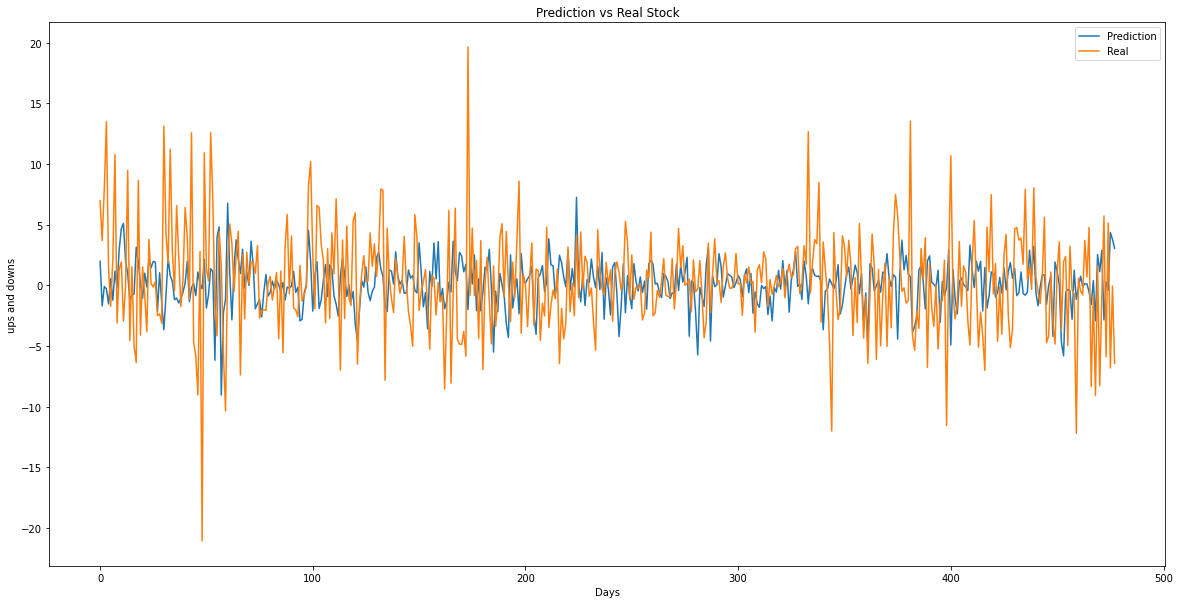

In [18]:
from Util import EvalTool

EvalTool.printEval('best_model.h5',test_target_data, test_train_data)

MSE Error is 35.95990762136222
45.67901234567901 %
46.740130127878906 $


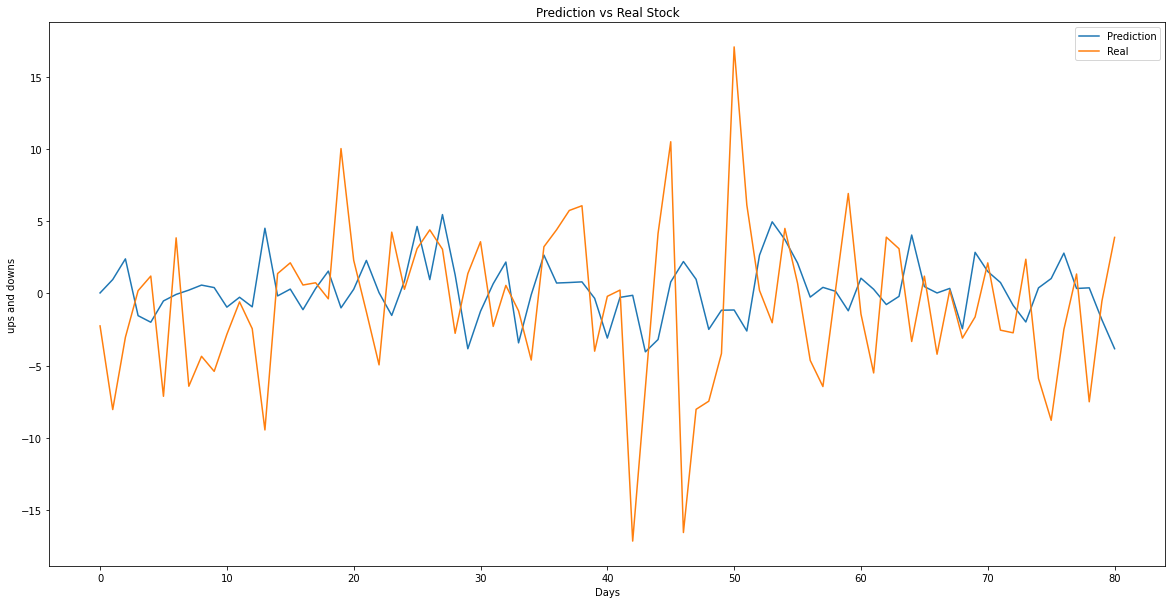

In [19]:
EvalTool.printEval('best_model.h5',CPNG_test_target_data, CPNG_test_train_data)

MSE Error is 23.03702365289162
46.728971962616825 %
66.35440284247215 $


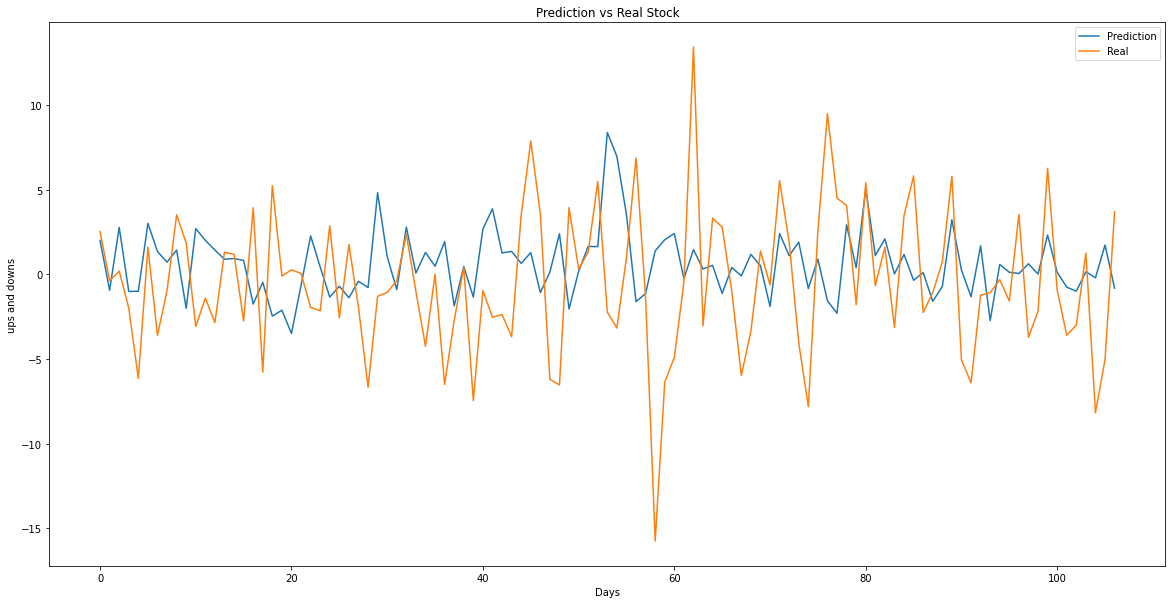

In [20]:
EvalTool.printEval('best_model.h5',PLTR_test_target_data, PLTR_test_train_data)

MSE Error is 20.957528780897295
52.719665271966534 %
201.70385031078402 $


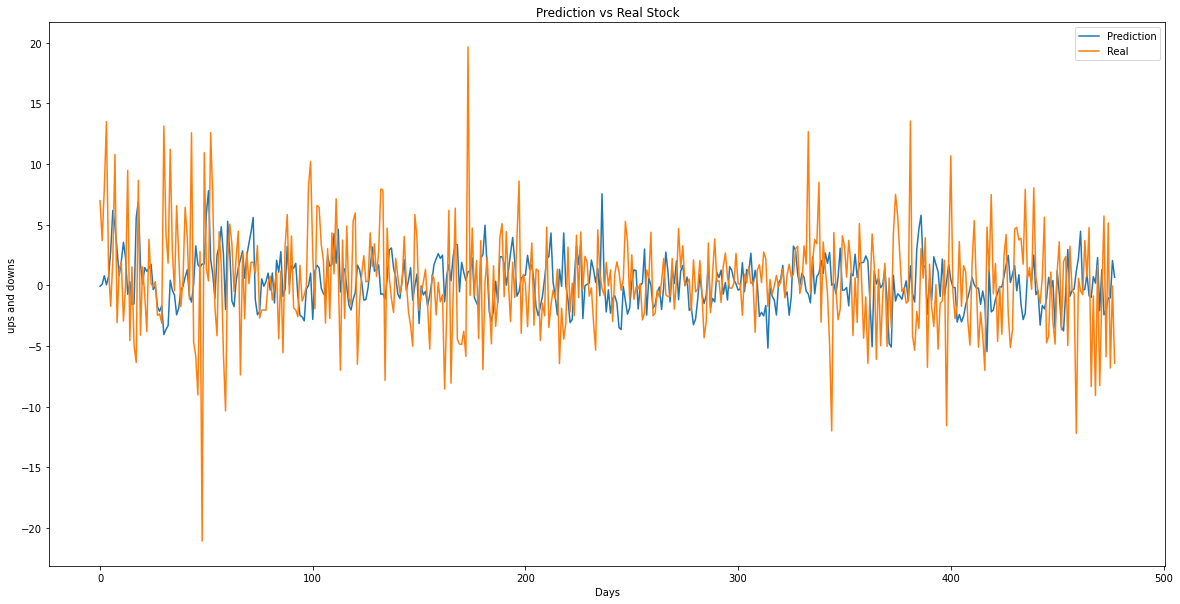

In [21]:

EvalTool.printEval('only_stock_best_model.h5',only_stock_test_target_data, only_stock_test_train_data)

MSE Error is 31.92209538256553
46.913580246913575 %
66.40549526310966 $


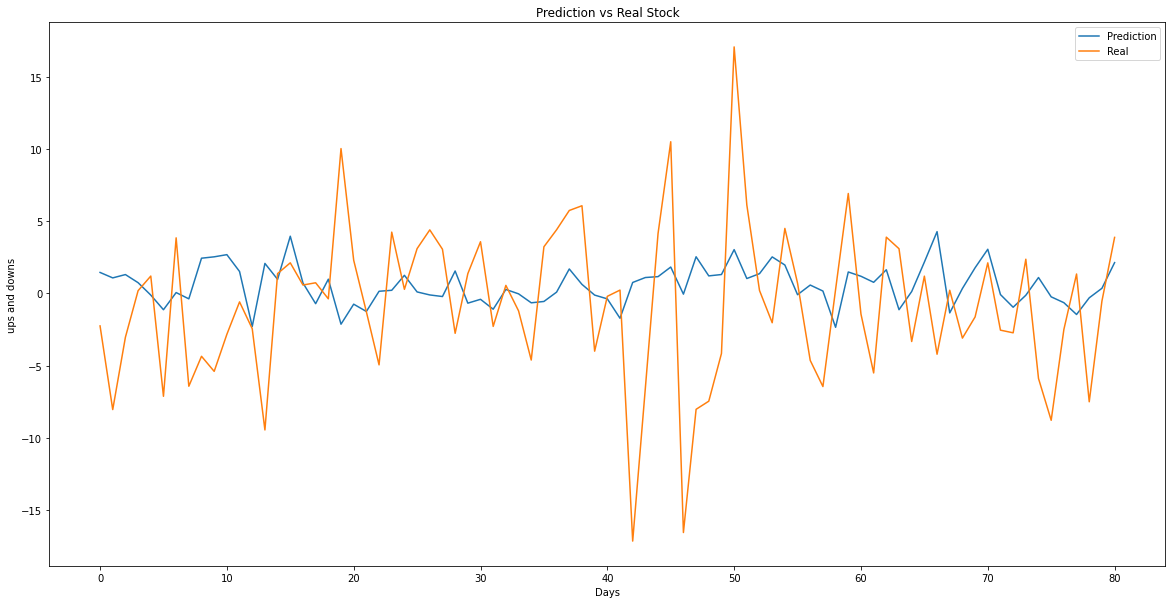

In [22]:

EvalTool.printEval('only_stock_best_model.h5',CPNG_only_stock_test_target_data, CPNG_only_stock_test_train_data)

MSE Error is 22.86623317696614
44.85981308411215 %
70.54007765644009 $


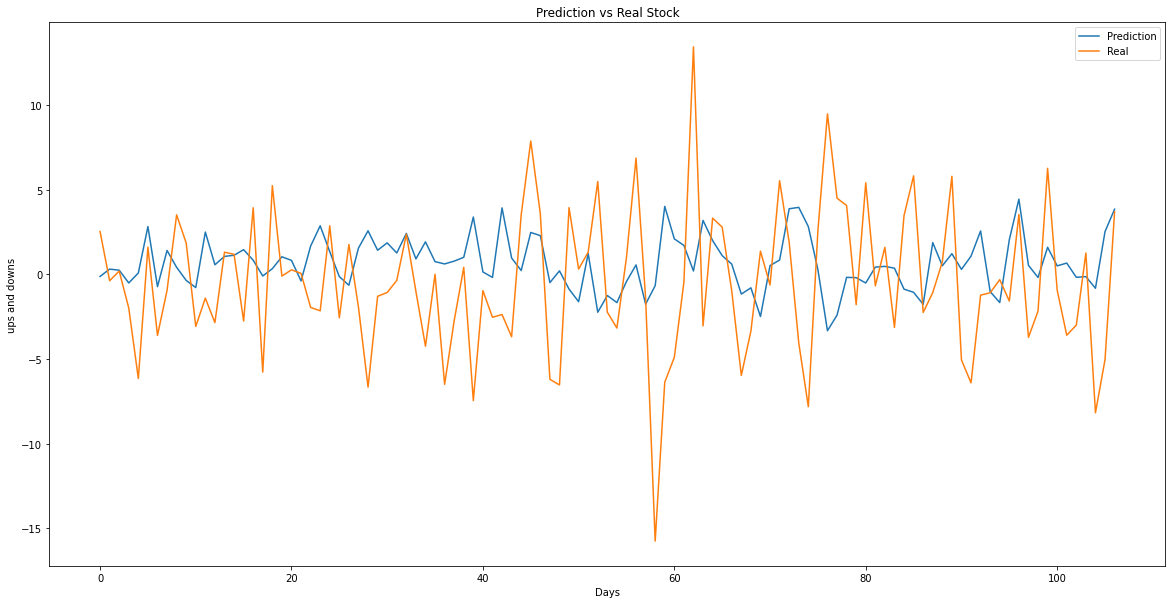

In [23]:

EvalTool.printEval('only_stock_best_model.h5',PLTR_only_stock_test_target_data, PLTR_only_stock_test_train_data)